# Import Libraries

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

In [144]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
%cd /content/drive/MyDrive/Course Material/Supervised Machine Learning/LSTM_TF

/content/drive/MyDrive/Course Material/Supervised Machine Learning/LSTM_TF


# Read the Data

In [146]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')   # encoding='ISO-8859-1' encodes "Latin alphabet no. 1",
                                                      #consisting of 191 characters from the Latin script.

In [147]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [148]:
df.shape

(5572, 5)

# Drop Irrelevant Features

In [149]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [150]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [151]:
df.shape

(5572, 2)

# Check for Null Values

In [152]:
df.isnull().any()

v1    False
v2    False
dtype: bool

# Rename the columns

In [153]:
df.columns = ['labels', 'Text']

In [154]:
df.head()

,labels,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Transform labels to integers

In [155]:
df['labels'] = df['labels'].map({'ham': 0, 'spam': 1})

In [156]:
df.head()

,labels,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Extracting features and labels

In [157]:
X = df['Text']

In [158]:
y = df['labels'].values
y.shape

(5572,)

In [159]:
y

array([0, 0, 1, ..., 0, 0, 0])

# Perform data Splitting

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Convert sentences to sequences

In [161]:
vocab_size = 20000
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Perform word to index mapping

In [162]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 7954 unique tokens.


# Sequence padding to get N X T Matrix

In [163]:
trainX = pad_sequences(sequences_train)
print('Shape of train tensor:', trainX.shape)

Shape of train tensor: (4457, 121)


# Set seq_len OR timesteps

In [164]:
T = trainX.shape[1]
print(T)

121


# Padding Test data

In [165]:
testX = pad_sequences(sequences_test, maxlen=T)
print('Shape of test tensor:', testX.shape)

Shape of test tensor: (1115, 121)


# Create LSTM Model for Text Classification

In [167]:
D = 20  # Set the dimension of embeddings

H = 15 # Hidden state dimensions

i = Input(shape=(T, ))
x = Embedding(V + 1, D)(i) # This is N x T x D array. (V + 1) b/c we started from index 1
x = LSTM(H, return_sequences=True)(x)
print(x.shape)                       # N x T x H # Batchsize x steps x hidden size
x = GlobalMaxPooling1D()(x)
print(" ")
print(x.shape)                       # N x H  # Batchsize x hiddensize
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

(None, 121, 15)
 
(None, 15)


In [168]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 121)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 121, 20)           159100    
                                                                 
 lstm_1 (LSTM)               (None, 121, 15)           2160      
                                                                 
 global_max_pooling1d_3 (Gl  (None, 15)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_1 (Dense)             (None, 1)                 16        
                                                                 
Total params: 161276 (629.98 KB)
Trainable params: 161276 (629.98 KB)
Non-trainable params: 0 (0.00 Byte)
___________________

# Compile the Model

In [169]:
model.compile( loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'] )

# Train the Model

In [170]:
hist = model.fit(
  trainX,
  y_train,
  epochs=10,
  validation_data=(testX, y_test)
)

Epoch 1/10
140/140 [==============================] - 12s 69ms/step - loss: 0.4552 - accuracy: 0.8546 - val_loss: 0.3296 - val_accuracy: 0.8655
Epoch 2/10
140/140 [==============================] - 7s 49ms/step - loss: 0.2880 - accuracy: 0.8661 - val_loss: 0.2599 - val_accuracy: 0.8655
Epoch 3/10
140/140 [==============================] - 9s 67ms/step - loss: 0.2265 - accuracy: 0.8661 - val_loss: 0.2158 - val_accuracy: 0.8655
Epoch 4/10
140/140 [==============================] - 7s 49ms/step - loss: 0.1776 - accuracy: 0.8930 - val_loss: 0.1727 - val_accuracy: 0.9731
Epoch 5/10
140/140 [==============================] - 9s 68ms/step - loss: 0.1293 - accuracy: 0.9935 - val_loss: 0.1356 - val_accuracy: 0.9839
Epoch 6/10
140/140 [==============================] - 7s 52ms/step - loss: 0.0887 - accuracy: 0.9973 - val_loss: 0.1051 - val_accuracy: 0.9865
Epoch 7/10
140/140 [==============================] - 9s 65ms/step - loss: 0.0608 - accuracy: 0.9991 - val_loss: 0.0890 - val_accuracy: 0.983

# Visualizing the Performance of Model

In [171]:
trainAcc = [100 * x for x in hist.history['accuracy']]
testAcc = [100 * x for x in hist.history['val_accuracy']]

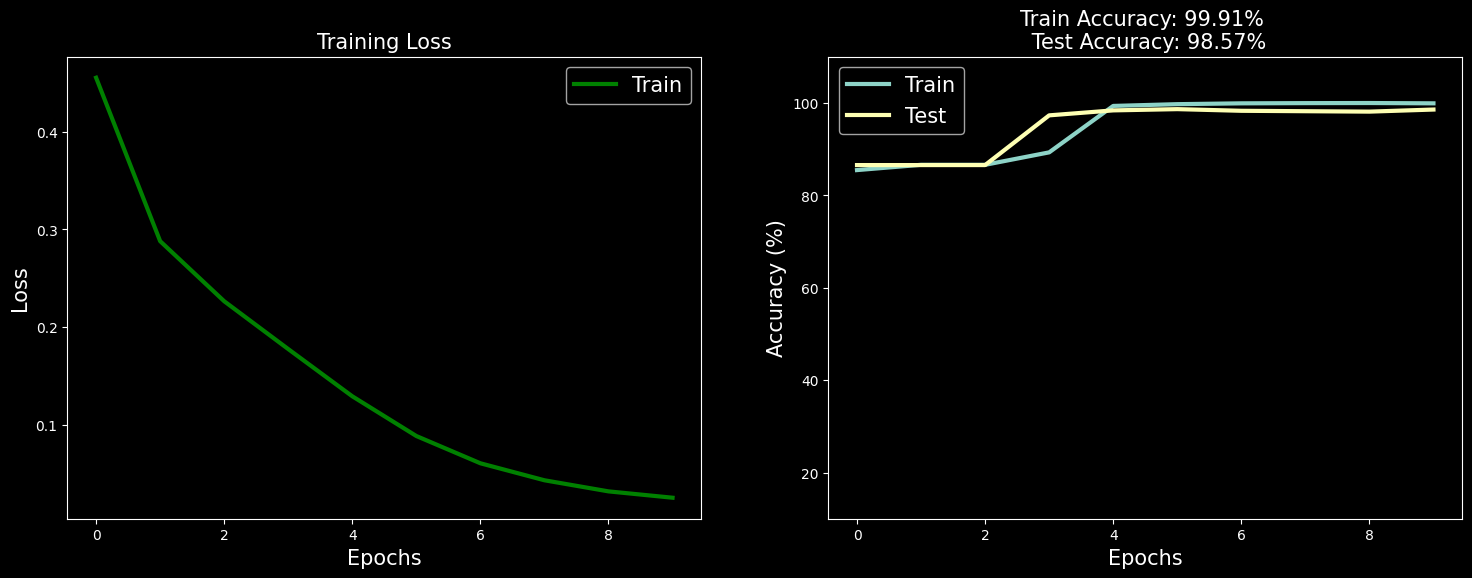

In [172]:
fig,ax = plt.subplots(1,2,figsize=(18,6))

ax[0].plot(hist.history['loss'], 'g', lw = 3, label = 'Train')
ax[0].set_xlabel('Epochs', fontsize = 15)
ax[0].set_ylabel('Loss', fontsize = 15)
ax[0].legend(fontsize = 15)
ax[0].set_title('Training Loss', fontsize = 15)


ax[1].plot(trainAcc, label ='Train', lw = 3)
ax[1].plot(testAcc, label ='Test', lw = 3)
ax[1].set_xlabel('Epochs', fontsize = 15)
ax[1].set_ylabel('Accuracy (%)', fontsize = 15)
ax[1].set_ylim([10,110])
ax[1].set_title(f'Train Accuracy: {trainAcc[-1]:.2f}% \n Test Accuracy: {testAcc[-1]:.2f}%', fontsize = 15)
ax[1].legend(fontsize = 15)

plt.show()

In [166]:
x = np.random.rand(2, 3, 4) # Batchsize x steps x features
y = GlobalMaxPooling1D()(x)
y.shape                     # Batchsize x features

TensorShape([2, 4])